<a href="https://colab.research.google.com/github/mikailachmad/Pengolahan-Citra-Digital/blob/main/PCD_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time, sys, os

def warna(teks, kode):
    return f"\033[{kode}m{teks}\033[0m"

def ketik(teks, delay=0.05):
    for huruf in teks:
        sys.stdout.write(huruf)
        sys.stdout.flush()
        time.sleep(delay)
    print()

os.system("cls" if os.name == "nt" else "clear")

judul = """
=========================================
     PENGOLAHAN CITRA DIGITAL
=========================================
"""

print(warna(judul, "90"))

ketik(warna("Nama Lengkap : ", "91") + "Mikail Achmad")
ketik(warna("NIM          : ", "92") + "24/542370/PA/23026")
ketik(warna("Kelas        : ", "93") + "KOM")

print("\n" + "-"*50 + "\n")

ketik(warna("Tugas PCD: The 3st Assignment", "94"), delay=0.05)

menu = "Implement one of the segmentation methods and several operation of morphological methods without using libraryom and comparing the segmentation result with and without applying morphological processing."

print(menu)


     PENGOLAHAN CITRA DIGITAL

Nama Lengkap : Mikail Achmad
NIM          : 24/542370/PA/23026
Kelas        : KOM

--------------------------------------------------

Tugas PCD: The 3st Assignment
Implement one of the segmentation methods and several operation of morphological methods without using libraryom and comparing the segmentation result with and without applying morphological processing.


# I. Set up Processed Image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

 Gambar Input Asli (Grayscale): 


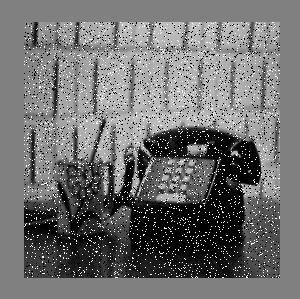

Ukuran gambar input: 89700 (tinggi, lebar)


In [ ]:
img_input = cv2.imread('/content/salt and pepper noise image.png', cv2.IMREAD_GRAYSCALE)

print(" Gambar Input Asli (Grayscale): ")
cv2_imshow(img_input)
print(f"Ukuran gambar input: {img_input.size} (tinggi, lebar)")

> Memuat Gambar Salt and Pepper Noise yang diambil dari Website Geeks for Geeks.

> Citra yang digunakan dalam metode Segmentasi dan Morfologi.

> Sumber: https://media.geeksforgeeks.org/wp-content/uploads/20190510181033/Screenshot-1841.png

# II. Create Segmentation Method Operation

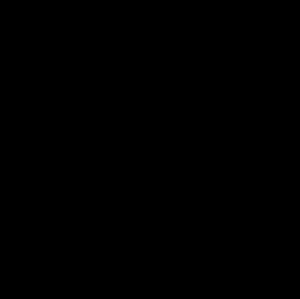

Ukuran gambar output: (299, 300)


In [ ]:
height, width = img_input.shape

img_output_segmentasi = np.zeros((height, width), dtype=np.uint8)

cv2_imshow(img_output_segmentasi)
print(f"Ukuran gambar output: {img_output_segmentasi.shape}")

> Menyiapkan kanvas kosong untuk pemrosesan gambar secara Segmentasi.

In [ ]:
threshold = 128
print(f"Ambang batas diatur ke {threshold}")

Ambang batas diatur ke 128


> Mengatur ambang batas ke 128, yang merupakan nilai tengah standar (0-255).

Hasil Segmentasi (Tanpa Morfologi): 


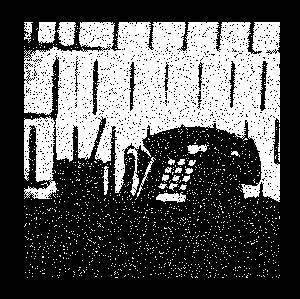

In [ ]:
# Iterasi melalui setiap baris (y, tinggi)
for y in range(height):
  # Iterasi melalui setiap kolom (x, lebar)
  for x in range(width):
    # Ambil nilai piksel grayscale dari gambar input
    pixel_value = img_input[y, x]

    # Terapkan logika thresholding
    if pixel_value > threshold:
      img_output_segmentasi[y, x] = 255
    else:
      img_output_segmentasi[y, x] = 0

print("Hasil Segmentasi (Tanpa Morfologi): ")
cv2_imshow(img_output_segmentasi)

> Output adalah gambar hitam-putih yang sangat kotor. Ada persamaan antara objek telepon dan background, yaitu keduanya memiliki bintik-bintik putih dan hitam. Ini membuktikan bahwa segmentasi sederhana tidak cukup untuk gambar yang noisy.

In [ ]:
image_segmentasi = "salt and pepper Segmentasi.png"
cv2.imwrite(image_segmentasi, img_output_segmentasi)

print(f"Hasil segmentasi telah disimpan sebagai: {image_segmentasi}")

Hasil segmentasi telah disimpan sebagai: salt and pepper Segmentasi.png


#III. Create Morphological Method 1: Erosion

In [ ]:
def erosi_manual(gambar_input):
  """
  Menerapkan operasi Erosi (Erosion) secara manual pafa gambar biner dengan kernel 3x3.
  """

  # Ambil dimensi gambar input
  height, width = gambar_input.shape

  # Buat gambar output kosong (diisi 0)
  # Kanvas baru hasil erosi
  gambar_output = np.zeros((height, width), dtype=np.uint8)

  # Iterasi melalui setiap piksel, kecuali border
  for y in range(1, height - 1):
    for x in range(1, width - 1):

      # Asumsikan semua piksel di jendela 3x3 adalah putih
      is_all_white = True

      # Loop kecil untuk memeriksa jendela 3x3
      for i in range(-1, 2): # y-offset (-1, 0, 1)
        for j in range(-1, 2): # x-offset (-1, 0, 1)

          # Periksa nilai piksel tetangga di gambar input
          if gambar_input[y + i, x + j] == 0:
            # Jika ditemukan 1 piksel hitam
            is_all_white = False
            break # Hentikan loop (j)

        if not is_all_white:
          break # Hentikan loop (i)

      # Set nillai piksel di gambar output
      if is_all_white:
        gambar_output[y, x] = 255

  print("Proses Erosi manual selesai.")
  return gambar_output

> Sebuah piksel output akan diset ke putih (255) jika semua piksel di dalam jendela 3x3 di sekitarnya pada gambar input juga putih. Jika ada satu saja piksel hitam (0) di dalam jendela itu, piksel output akan menjadi hitam (0).

> Alasan utama menerapkan metode ini sebagai langkah pertama untuk membersihkan "salt noise" (bintik-bintik putih) di background, bintik-bintik terisolasi ini akan dikelilingi oleh piksel hitam, sehingga akan dihapus (dijadikan hitam). Lanngkah ini krusial sebagai bagian pertama dari operasi Erosi, yang bertujuan membersihkan noise di background sebelum membangun kembali bentuk objek di langkah berikutnya.

Proses Erosi manual selesai.

Hasil Setelah Erosi


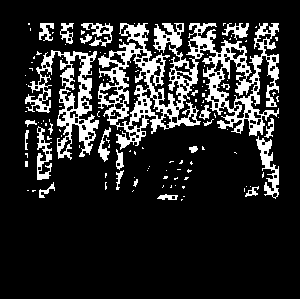

In [ ]:
img_hasil_erosi = erosi_manual(img_output_segmentasi)

print("\nHasil Setelah Erosi")
cv2_imshow(img_hasil_erosi)

> Output menunjukkan bahwa:

1. Sebagian besar bintik-bintik putih (salt noise) yang tadinya tersebar di background hitam telah hilang.

2. Objek teleponnya juga terlihat menyusut atau terkikis.

3. Lubang-lubang hitam (pepper noise) di dalam telepon terlihat semakin membesar.

# IV. Create Morphological Method 2: Dilation

In [ ]:
def dilasi_manual(gambar_input):
    """
    Menerapkan operasi Dilasi (Dilation) secara manual
    pada gambar biner dengan kernel 3x3.
    """

    height, width = gambar_input.shape
    gambar_output = np.zeros((height, width), dtype=np.uint8)

    for y in range(1, height - 1):
        for x in range(1, width - 1):

            # Asumsikan tidak ada piksel putih
            is_any_white = False

            # Loop 3x3
            for i in range(-1, 2):
                for j in range(-1, 2):

                    # Cek nilai piksel tetangga
                    if gambar_input[y + i, x + j] == 255:
                        is_any_white = True # <--- Jika ketemu 1 saja, set True
                        break

                if is_any_white:
                    break

            # Set nilai piksel di gambar OUTPUT
            if is_any_white:
                # Jika ada minimal 1 piksel putih, output jadi PUTIH
                gambar_output[y, x] = 255
            # else:
            #   gambar_output[y, x] = 0 (tetap hitam)

    print("Proses Dilasi manual selesai.")
    return gambar_output

> Sebuah piksel output akan diset ke putih (255) jika minimal ada satu piksel putih di dalam jendela 3x3 di sekitarnya pada gambar input. Piksel output hanya akan menjadi hitam (0) jika semua piksel di jendela 3x3 itu hitam.

> Dalam alur tugas ini, Dilasi memiliki dua peran penting: pertama, sebagai langkah kedua dalam operasi Opening (Erosi → Dilasi), ia bertugas menebalkan kembali objek utama yang menyusut setelah erosi sehingga bentuknya pulih, sementara noise putih yang sudah terhapus tidak akan kembali. Kedua, ia bertugas sebagai langkah pertama dalam operasi Closing (Dilasi → Erosi), di mana sifat ekspansifnya dimanfaatkan untuk menambal lubang-lubang hitam (pepper noise) di dalam objek, karena piksel putih di sekitar lubang akan melebar dan menutupinya.

Proses Dilasi manual selesai.
Hasil Setelah Opening (Erosi lalu Dilasi)


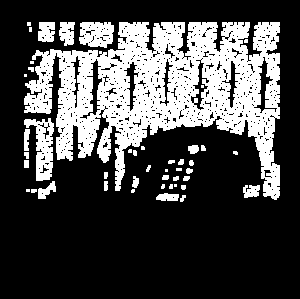

In [ ]:
img_hasil_opening = dilasi_manual(img_hasil_erosi)

print("Hasil Setelah Opening (Erosi lalu Dilasi)")
cv2_imshow(img_hasil_opening)

> Output menunjukkan bahwa:

1. Bintik-bintik putih pada latar belakang tidak kembali karena telah dihapus oleh Erosi, dan Dilasi tidak bisa menghidupkan piksel yang sudah 0 di area yang terisolasi.

2. Objek telepon (dan sisa noise di background) yang tadinya terkikis sekarang sudah menebal kembali ke ukuran yang lebih normal.

#5. Cleaning salt-and-pepper noise

Menerapkan Dilasi (bagian dari Closing): 
Proses Dilasi manual selesai.
Menerapkan Erosi (bagian dari Closing): 
Proses Erosi manual selesai.
Proses Closing Selesai.
Hasil Akhir Gambar dengan Morfologi: 


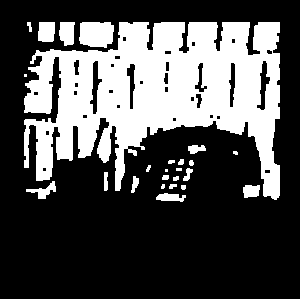

In [ ]:
print("Menerapkan Dilasi (bagian dari Closing): ")
img_setelah_dilasi_closing = dilasi_manual(img_hasil_opening)

print("Menerapkan Erosi (bagian dari Closing): ")
img_hasil_closing = erosi_manual(img_setelah_dilasi_closing)
print("Proses Closing Selesai.")

print("Hasil Akhir Gambar dengan Morfologi: ")
cv2_imshow(img_hasil_closing)

> Output menunjukkan bahwa:

1. Background hitam sudah bersih yang merupakan hasil dari Opening.

2. Objek telepon yang tadinya bolong-bolong hitam sekarang sudah solid dan utuh sebagai hasil dari Closing.

3. Siluet telepon terlihat dengan jelas, berbeda jauh dari gambar hasil segmentasi pertama yang terlihat hancur.

In [ ]:
hasil_akhir = "salt and pepper Morfologi.png"
cv2.imwrite(hasil_akhir, img_hasil_closing)

print(f"Gambar hasil akhir telah disimpan sebagai: {hasil_akhir}")

Gambar hasil akhir telah disimpan sebagai: salt and pepper Morfologi.png


# 6. Analysis and Compare

In [ ]:
# 1. Gambar Input Asli
img_display_input = cv2.cvtColor(img_input, cv2.COLOR_GRAY2BGR)

# 2. Gambar Hasil Segmentasi
img_display_before = cv2.cvtColor(img_output_segmentasi, cv2.COLOR_GRAY2BGR)

# 3. Gambar Hasil Morfologi
img_display_after = cv2.cvtColor(img_hasil_closing, cv2.COLOR_GRAY2BGR)

Perbandingan Akhir: 


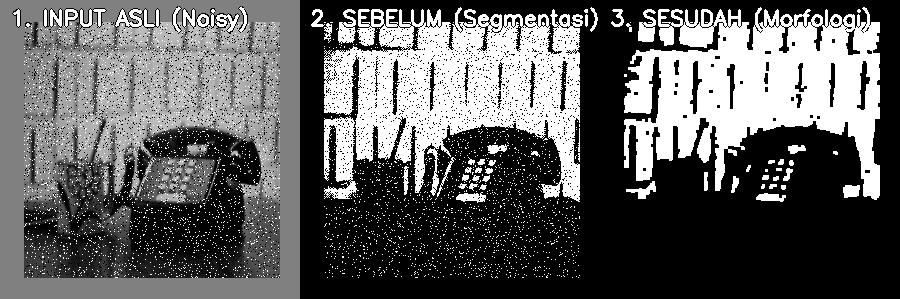

In [ ]:
# Tambahkan Label Teks ke setiap gambar
font = cv2.FONT_HERSHEY_SIMPLEX
posisi_teks = (10, 25)
skala_font = 0.7
warna_putih = (255, 255, 255)
warna_hitam = (0, 0, 0)
ketebalan = 2

# Menambahkan teks dengan outline hitam agar terbaca di area
cv2.putText(img_display_input, '1. INPUT ASLI (Noisy)', posisi_teks, font, skala_font, warna_hitam, ketebalan + 2)
cv2.putText(img_display_input, '1. INPUT ASLI (Noisy)', posisi_teks, font, skala_font, warna_putih, ketebalan)

cv2.putText(img_display_before, '2. SEBELUM (Segmentasi)', posisi_teks, font, skala_font, warna_hitam, ketebalan + 2)
cv2.putText(img_display_before, '2. SEBELUM (Segmentasi)', posisi_teks, font, skala_font, warna_putih, ketebalan)

cv2.putText(img_display_after, '3. SESUDAH (Morfologi)', posisi_teks, font, skala_font, warna_hitam, ketebalan + 2)
cv2.putText(img_display_after, '3. SESUDAH (Morfologi)', posisi_teks, font, skala_font, warna_putih, ketebalan)

perbandingan = np.hstack((img_display_input, img_display_before, img_display_after))

print("Perbandingan Akhir: ")
cv2_imshow(perbandingan)

> Perbandingan antara ketiga gambar di atas membuktikan bahwa segmentasi sederhana tidak cukup untuk memproses gambar yang memiliki noise. Pemrosesan morfologi adalah langkah krusial untuk membersihkan noise dan merekonstruksi bentuk objek. Operasi Opening efektif menghilangkan noise putih di luar objek, sementara Closing efektif mengisi lubang hitam di dalam objek.